### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
# Read CSV train data file into DataFrame
data=pd.read_csv('Project2_Classification_HouseGrade_Data_Project-625edbc5-68f4-4fe4-97f2-29ba63a71a0e.csv')
df=data.copy()

# preview the data
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [3]:
# Dropping ID column from dataset
df=df.drop(['Id'],axis=1)
df.head(2)

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,358,5,4,3,4,YES,71,96,3,72,4,3510,D


### Number of rows and columns

In [4]:
# shape of the dataset
data.shape

(3000, 14)

### Names of all the columns

In [5]:

data.columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

### Checking if there are null values in any columns

In [6]:
# check missing values in data
df.isnull().sum()  

Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [7]:
# explore the existing data types
df.dtypes

Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [ ]:
#explore the numeric data types
df.describe()

## Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

#Encoding object variable to numeric variable
label_encoder = LabelEncoder()

df['roof'] = label_encoder.fit_transform(df['roof'])
df['Grade'] = label_encoder.fit_transform(df['Grade'])

df.dtypes

Area(total)       int64
Trooms            int64
Nbedrooms         int64
Nbwashrooms       int64
Twashrooms        int64
roof              int32
Roof(Area)        int64
Lawn(Area)        int64
Nfloors           int64
API               int64
ANB               int64
Expected price    int64
Grade             int32
dtype: object

## Data Visuliazation

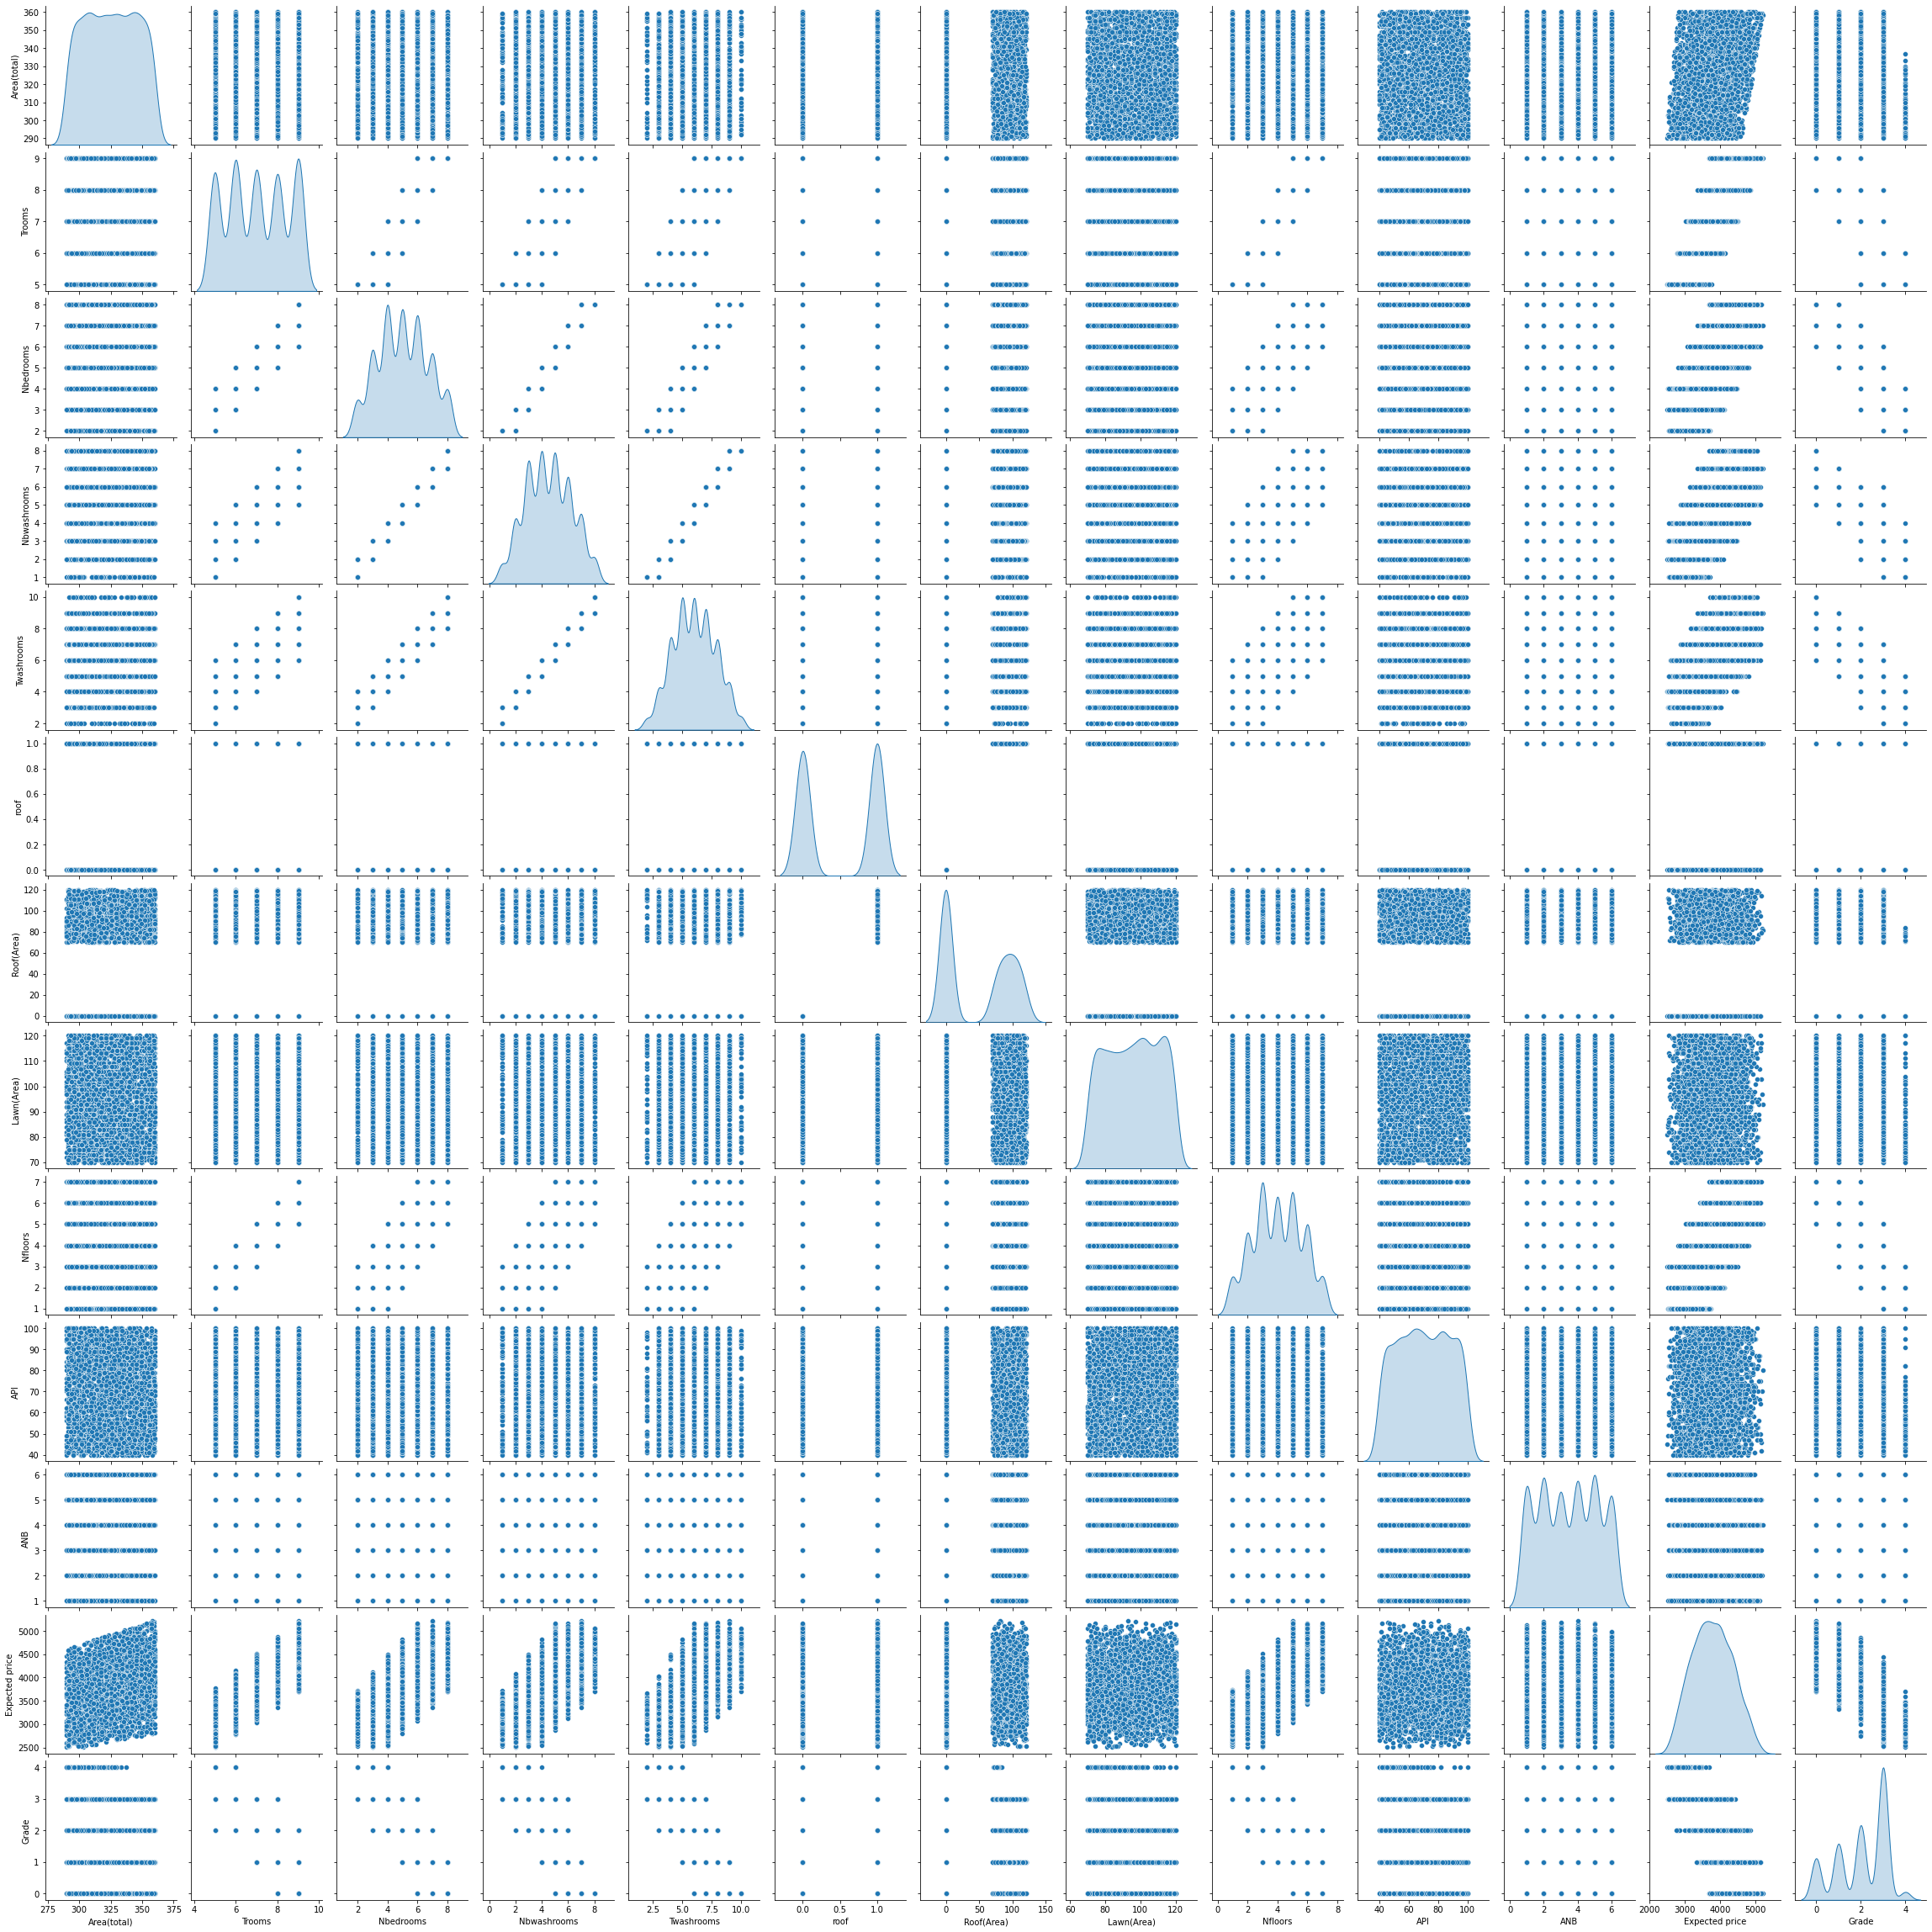

In [9]:
sns.pairplot(df, diag_kind='kde')

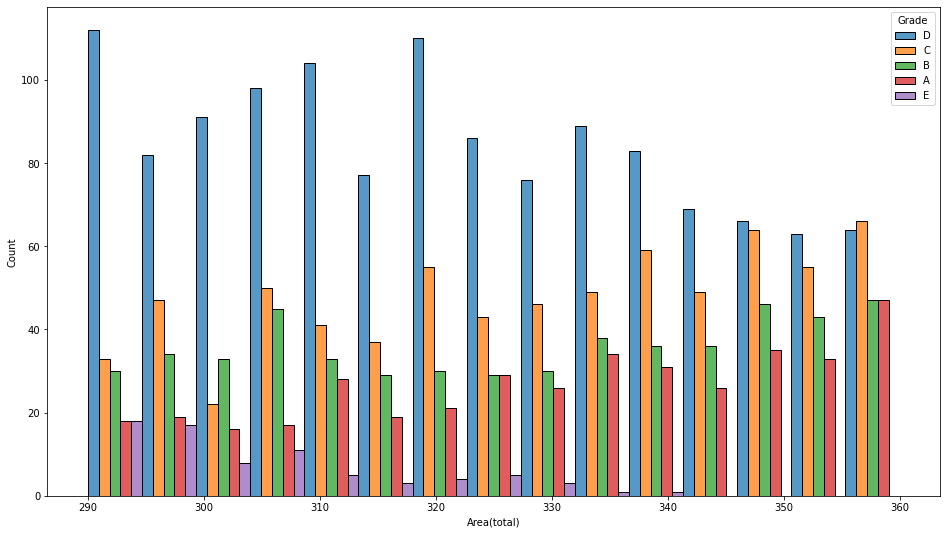

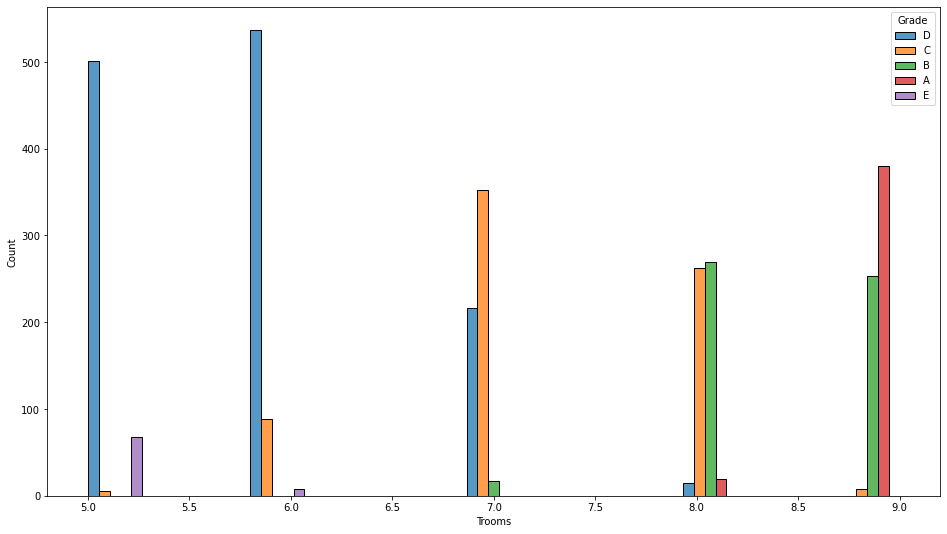

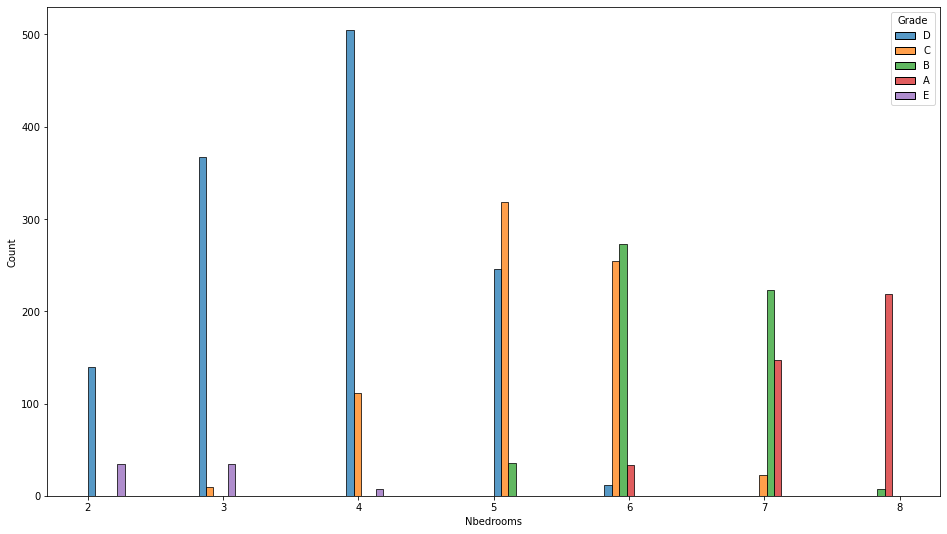

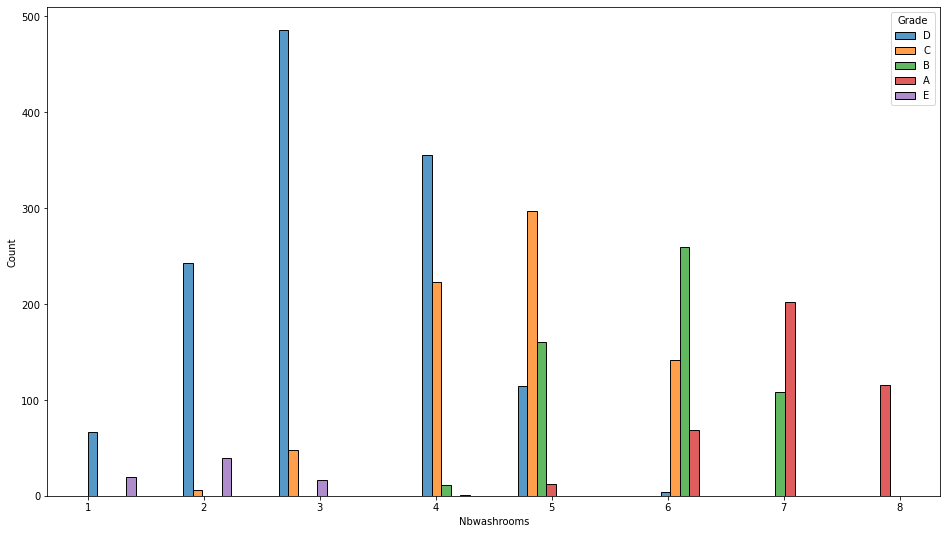

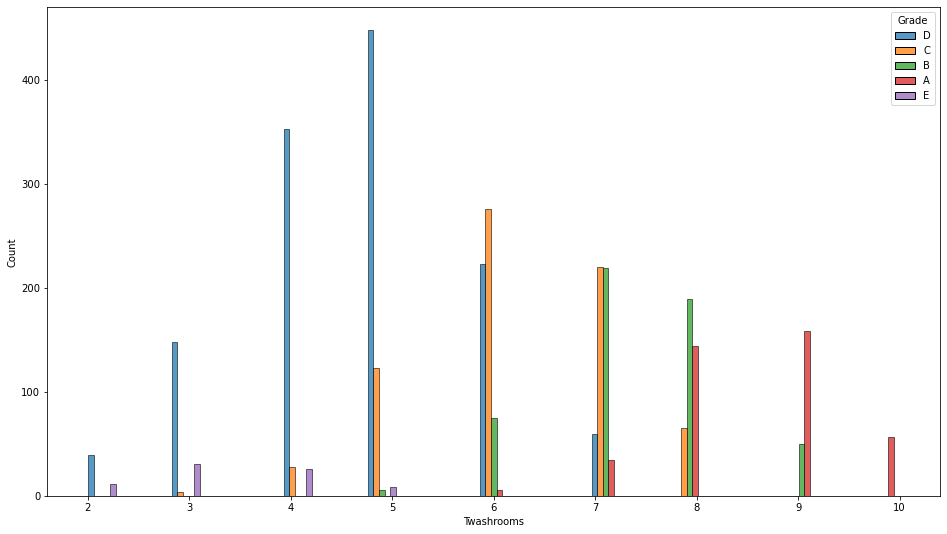

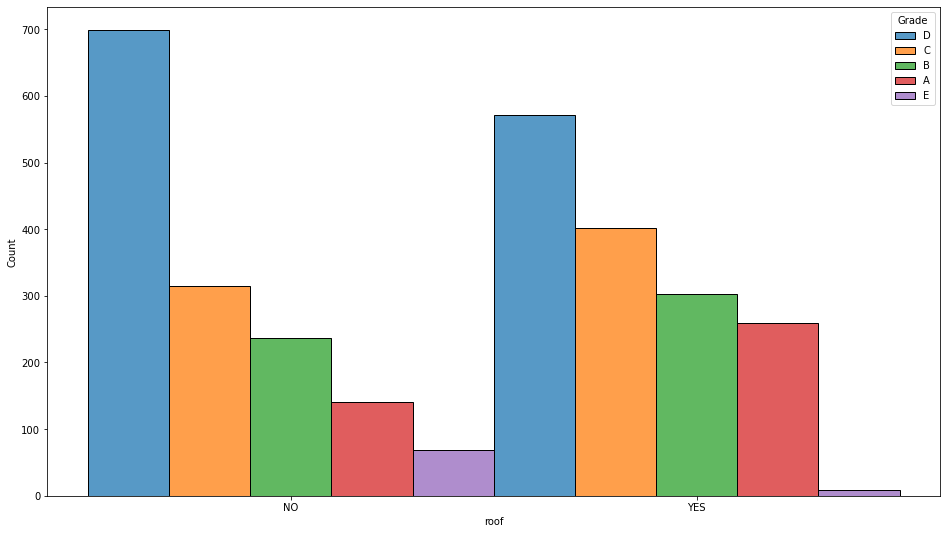

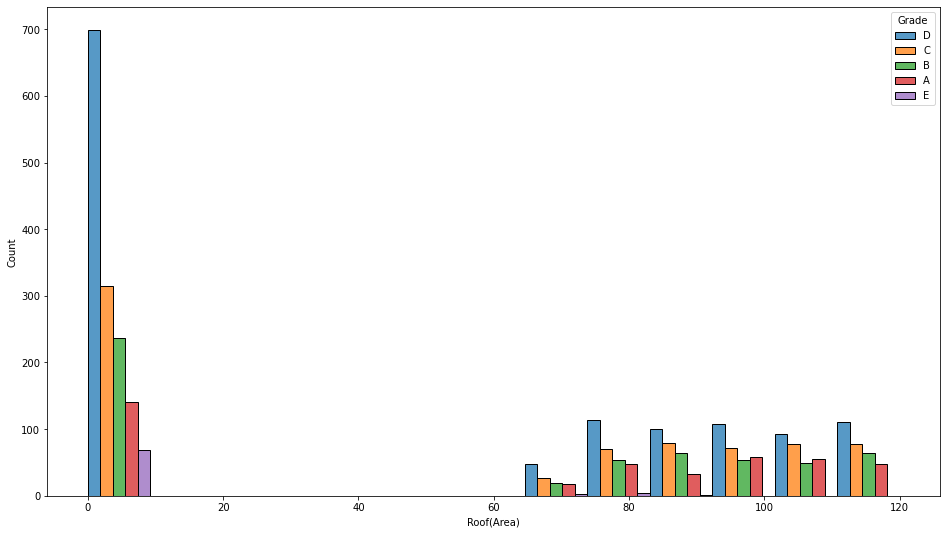

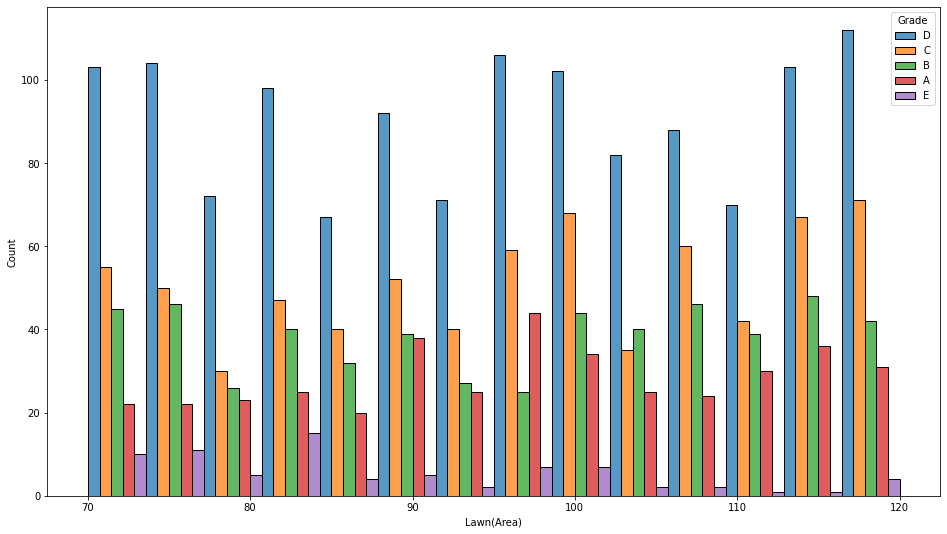

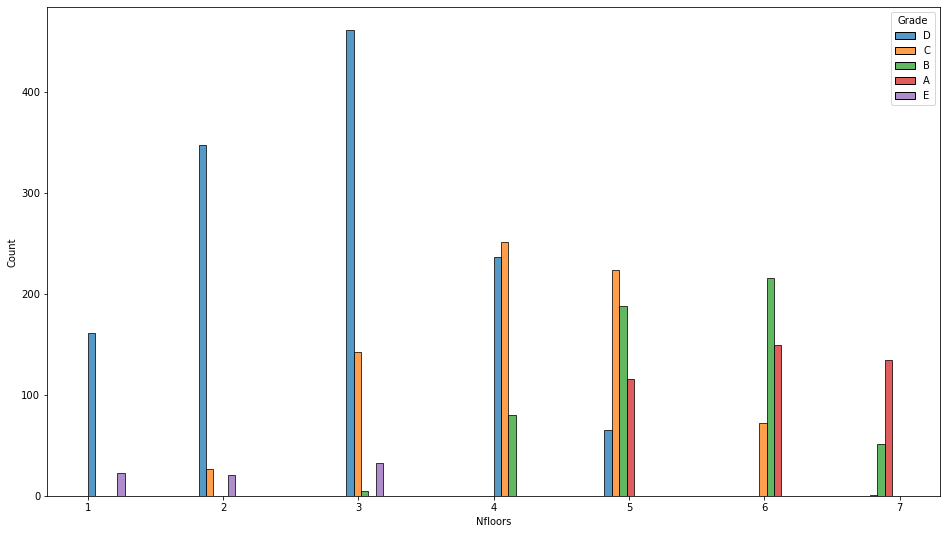

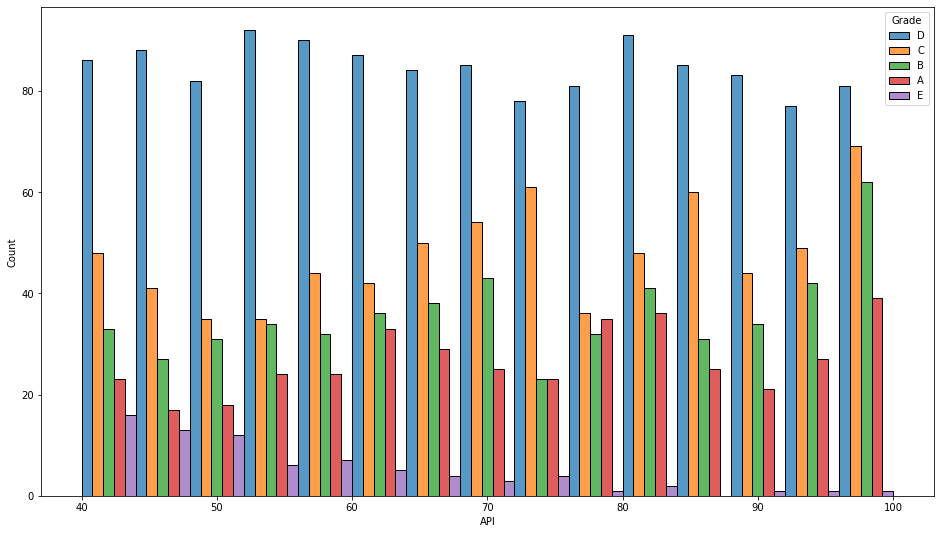

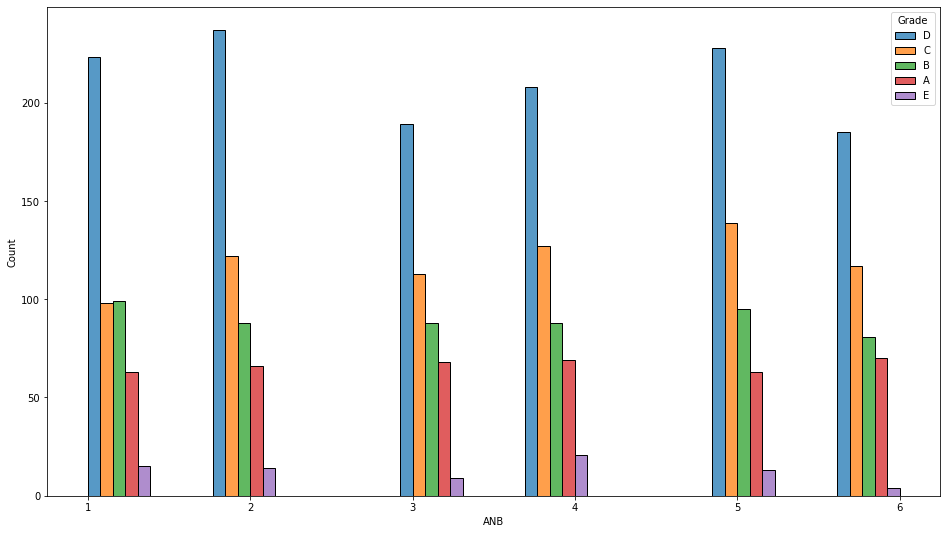

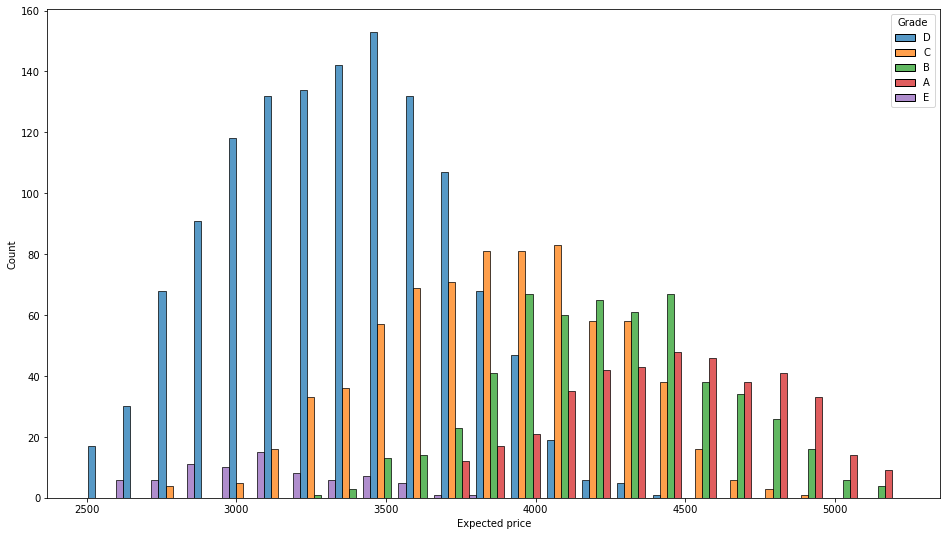

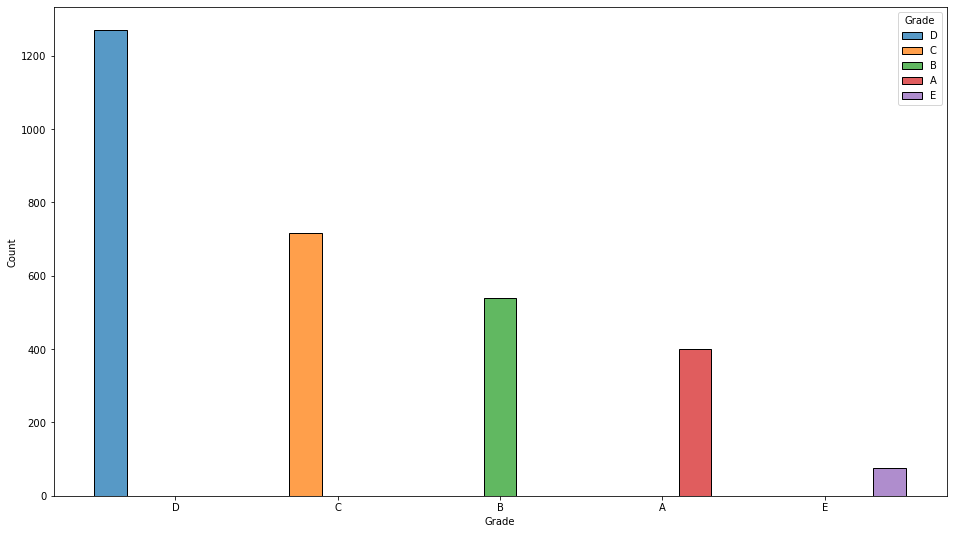

In [10]:
for i in df.columns:
    plt.figure(figsize=(16,9))
    sns.histplot(data,x=i,hue='Grade',multiple='dodge')

plt.show()

#### Interpretation

    With increases in area the number of grade A and B houses are also increasing

    In Grade A houses most number of houses have 9 rooms
    In Grade B houses most number of houses have 8 - 9 rooms
    In Grade C houses most number of houses have 7 - 8 rooms
    In Grade D houses most number of houses have 5 - 6 rooms
    In Grade E houses most number of houses have 5 rooms
    
    In Grade A houses most number of houses have 7 - 8 bedrooms
    In Grade B houses most number of houses have 6 - 7 bedrooms
    In Grade C houses most number of houses have 5 - 6 bedrooms
    In Grade D houses most number of houses have 2 - 4 bedrooms
    In Grade E houses most number of houses have 2 - 3 bedrooms
    
    In Grade A houses most number of houses have 6 - 8 attach washrooms
    In Grade B houses most number of houses have 5 - 6 attach washrooms
    In Grade C houses most number of houses have 4 - 6 attach washrooms
    In Grade D houses most number of houses have 2 - 5 attach washrooms
    In Grade E houses most number of houses have 1 - 3 attach washrooms
    
    In Grade A houses most number of houses have 8 - 10 washrooms
    In Grade B houses most number of houses have 6 - 9 washrooms
    In Grade C houses most number of houses have 5 - 8 washrooms
    In Grade D houses most number of houses have 3 - 5 washrooms
    In Grade E houses most number of houses have 2 - 4 washrooms
    
    In Grade A houses most number of houses have roof
    In Grade B houses most number of houses have roof
    In Grade C houses most number of houses have roof
    In Grade D houses most number of houses have NO roof
    In Grade E houses most number of houses have NO roof
    
    In Grade D houses maximum Lawn(Area)
    
    In Grade A houses price in range 3700 - 5216
    In Grade B houses price in range 3323 - 5163 
    In Grade C houses price in range 2752 - 4864
    In Grade D houses price in range 2528 - 4435
    In Grade E houses price in range 2504 - 3704
    
    The count of Grade A houses is 399
    The count of Grade B houses is 539
    The count of Grade C houses is 716
    The count of Grade D houses is 1270
    The count of Grade E houses is 76

### Correlation

<AxesSubplot:>

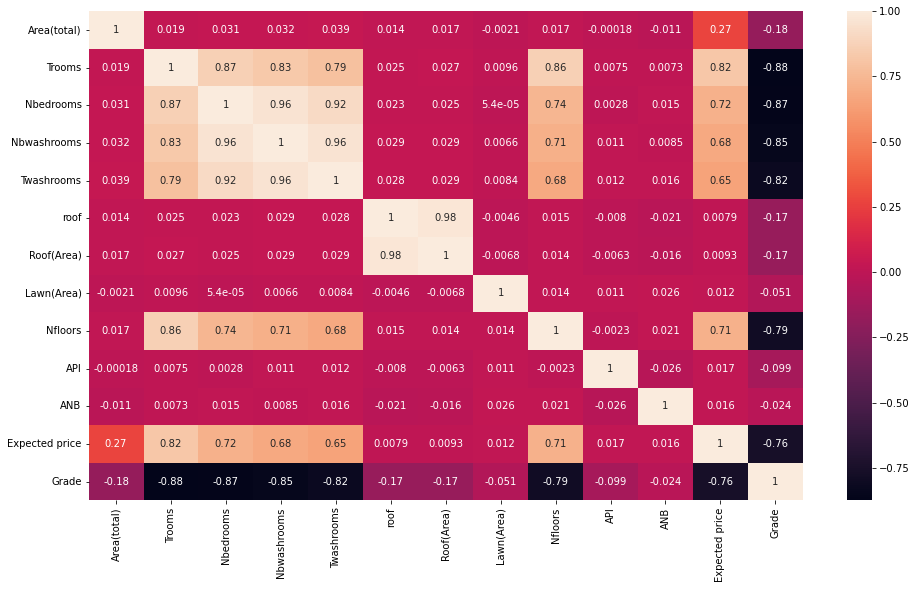

In [11]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,)

#### Interpretation
Trooms, Nbedrooms, Nbwashrooms, Twashrooms, Nfloors and Expected price has most corelated with Grade

### Data Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts

x=df.iloc[:,:12]
y=df.iloc[:,[12]]

#Creating test and training datasets

xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.2,random_state=777)

#Feature scalling

sc=MinMaxScaler()
xtr=sc.fit_transform(xtrain)
xte=sc.fit_transform(xtest)

### Appling LDA for freature reduction

Text(0, 0.5, 'Variance Explained')

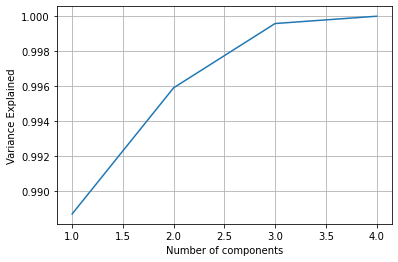

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


v=[]

for i in range (1,5):
    lda = LinearDiscriminantAnalysis(n_components=i)
    lda.fit(xtr,ytrain)
    
    v.append(np.sum(lda.explained_variance_ratio_))

plt.plot(range(1,5), v)
plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Variance Explained')

Number of components = 2

In [14]:
lda = LinearDiscriminantAnalysis(n_components=2)
x_tr=lda.fit_transform(xtr,ytrain)

x_te=lda.transform(xte)

## Modelling

### GaussianNB

#### Without dimension reduction

In [15]:
from sklearn.naive_bayes import GaussianNB

# GaussianNB - training the model
gnb = GaussianNB()  
gnb.fit(xtr, ytrain)

# Using the trained model to predict the outcome of the xte dataset
gnb_pred = gnb.predict(xte)
gnb1_pred = gnb.predict(xtr)

#Calculating the accuracy of the training dataset
print('GaussianNB: Testing accuracy:',gnb.score(xte,ytest))

GaussianNB: Testing accuracy: 0.8083333333333333


##### Evalution

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(ytest,gnb_pred))
print('\n\n')
print(classification_report(ytest, gnb_pred))

[[ 66  16   0   0   0]
 [  8  95  12   0   0]
 [  0  16 110  16   0]
 [  0   0  30 204  11]
 [  0   0   0   6  10]]



              precision    recall  f1-score   support

           0       0.89      0.80      0.85        82
           1       0.75      0.83      0.79       115
           2       0.72      0.77      0.75       142
           3       0.90      0.83      0.87       245
           4       0.48      0.62      0.54        16

    accuracy                           0.81       600
   macro avg       0.75      0.77      0.76       600
weighted avg       0.82      0.81      0.81       600



#### With dimension reduction

In [17]:
from sklearn.naive_bayes import GaussianNB

# GaussianNB - training the model
gnbr = GaussianNB()  
gnbr.fit(x_tr, ytrain)

# Using the trained model to predict the outcome of the x_te dataset
gnb_predr = gnbr.predict(x_te)
gnb1_predr = gnbr.predict(x_tr)

#Calculating the accuracy of the test dataset
print('GaussianNB: Testing accuracy:',gnbr.score(x_te,ytest))

GaussianNB: Testing accuracy: 0.9116666666666666


##### Evalution

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(ytest,gnb_predr))
print('\n\n')
print(classification_report(ytest, gnb_predr))

[[ 70  12   0   0   0]
 [ 12  99   4   0   0]
 [  0   7 126   9   0]
 [  0   0   4 240   1]
 [  0   0   0   4  12]]



              precision    recall  f1-score   support

           0       0.85      0.85      0.85        82
           1       0.84      0.86      0.85       115
           2       0.94      0.89      0.91       142
           3       0.95      0.98      0.96       245
           4       0.92      0.75      0.83        16

    accuracy                           0.91       600
   macro avg       0.90      0.87      0.88       600
weighted avg       0.91      0.91      0.91       600



### DecisionTreeClassifier

#### Without dimension reduction 

In [19]:
from sklearn.tree import DecisionTreeClassifier

#finding best max_depth value
for i in range (1,20):
    dtc = DecisionTreeClassifier(max_depth=i,random_state=777)
    dtc.fit(xtr,ytrain)
    print('Accuracy for max dept {} : {}'.format(i,dtc.score(xte,ytest)))

Accuracy for max dept 1 : 0.59
Accuracy for max dept 2 : 0.725
Accuracy for max dept 3 : 0.755
Accuracy for max dept 4 : 0.8016666666666666
Accuracy for max dept 5 : 0.83
Accuracy for max dept 6 : 0.85
Accuracy for max dept 7 : 0.8583333333333333
Accuracy for max dept 8 : 0.86
Accuracy for max dept 9 : 0.8666666666666667
Accuracy for max dept 10 : 0.8516666666666667
Accuracy for max dept 11 : 0.8533333333333334
Accuracy for max dept 12 : 0.8583333333333333
Accuracy for max dept 13 : 0.8516666666666667
Accuracy for max dept 14 : 0.8516666666666667
Accuracy for max dept 15 : 0.8516666666666667
Accuracy for max dept 16 : 0.8516666666666667
Accuracy for max dept 17 : 0.8516666666666667
Accuracy for max dept 18 : 0.8516666666666667
Accuracy for max dept 19 : 0.8516666666666667


In [20]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(max_depth=9,random_state=777)

# Train Decision Tree Classifer
dtc.fit(xtr,ytrain)

#Predict the response for test dataset
dtc_pred = dtc.predict(xte)
dtc1_pred = dtc.predict(xtr)

#Calculating the accuracy of the test dataset
print('DecisionTreeClassifier: Testing accuracy:',dtc.score(xte,ytest))

DecisionTreeClassifier: Testing accuracy: 0.8666666666666667


##### Evalution

In [21]:
print(confusion_matrix(ytest,dtc_pred))
print('\n\n')
print(classification_report(ytest, dtc_pred))

[[ 75   7   0   0   0]
 [  8  97  10   0   0]
 [  0  12 109  21   0]
 [  0   0  11 229   5]
 [  0   0   0   6  10]]



              precision    recall  f1-score   support

           0       0.90      0.91      0.91        82
           1       0.84      0.84      0.84       115
           2       0.84      0.77      0.80       142
           3       0.89      0.93      0.91       245
           4       0.67      0.62      0.65        16

    accuracy                           0.87       600
   macro avg       0.83      0.82      0.82       600
weighted avg       0.87      0.87      0.87       600



#### With dimension reduction 

In [22]:
#finding best max_depth value
for i in range (1,20):
    dtcr = DecisionTreeClassifier(max_depth=i,random_state=777)
    dtcr.fit(x_tr,ytrain)
    print('Accuracy for max dept {} : {}'.format(i,dtcr.score(x_te,ytest)))

Accuracy for max dept 1 : 0.615
Accuracy for max dept 2 : 0.79
Accuracy for max dept 3 : 0.905
Accuracy for max dept 4 : 0.9116666666666666
Accuracy for max dept 5 : 0.9183333333333333
Accuracy for max dept 6 : 0.9316666666666666
Accuracy for max dept 7 : 0.9283333333333333
Accuracy for max dept 8 : 0.93
Accuracy for max dept 9 : 0.92
Accuracy for max dept 10 : 0.9166666666666666
Accuracy for max dept 11 : 0.9216666666666666
Accuracy for max dept 12 : 0.9166666666666666
Accuracy for max dept 13 : 0.9183333333333333
Accuracy for max dept 14 : 0.9183333333333333
Accuracy for max dept 15 : 0.92
Accuracy for max dept 16 : 0.92
Accuracy for max dept 17 : 0.92
Accuracy for max dept 18 : 0.92
Accuracy for max dept 19 : 0.92


In [23]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dtcr = DecisionTreeClassifier(max_depth=6,random_state=777)

# Train Decision Tree Classifer
dtcr.fit(x_tr,ytrain)

#Predict the response for test dataset
dtc_predr = dtcr.predict(x_te)
dtc1_predr = dtcr.predict(x_tr)

#Calculating the accuracy of the test dataset
print('DecisionTreeClassifier: Testing accuracy:',dtcr.score(x_te,ytest))

DecisionTreeClassifier: Testing accuracy: 0.9316666666666666


##### Evalution

In [24]:
print(confusion_matrix(ytest,dtc_predr))
print('\n\n')
print(classification_report(ytest, dtc_predr))

[[ 72  10   0   0   0]
 [  6 104   5   0   0]
 [  0   5 130   7   0]
 [  0   0   3 239   3]
 [  0   0   0   2  14]]



              precision    recall  f1-score   support

           0       0.92      0.88      0.90        82
           1       0.87      0.90      0.89       115
           2       0.94      0.92      0.93       142
           3       0.96      0.98      0.97       245
           4       0.82      0.88      0.85        16

    accuracy                           0.93       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.93      0.93      0.93       600



### RandomForestClassifier(Bagging)

#### Without dimension reduction

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create Decision Tree classifer object
rf = RandomForestClassifier(random_state=777, n_jobs=-1)

# Parameters for hyperparameter tunning
params = {
    'max_depth': range(2,20),
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(xtr, ytrain)

# Best Parameter
print(grid_search.best_estimator_)

#Calculating the accuracy of the test dataset
print('\nAccuracy',grid_search.best_score_)

#Predict the response for test dataset
rfc_pred = grid_search.predict(xte)
rfc1_pred = grid_search.predict(xtr)

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=777)

Accuracy 0.8825000000000001


##### Evalution

In [26]:
print(confusion_matrix(ytest,rfc_pred))
print('\n\n')
print(classification_report(ytest, rfc_pred))

[[ 70  12   0   0   0]
 [  2 101  12   0   0]
 [  0   6 114  22   0]
 [  0   0   8 237   0]
 [  0   0   0  12   4]]



              precision    recall  f1-score   support

           0       0.97      0.85      0.91        82
           1       0.85      0.88      0.86       115
           2       0.85      0.80      0.83       142
           3       0.87      0.97      0.92       245
           4       1.00      0.25      0.40        16

    accuracy                           0.88       600
   macro avg       0.91      0.75      0.78       600
weighted avg       0.88      0.88      0.87       600



#### With dimension reduction

In [27]:
# Create Decision Tree classifer object
rf = RandomForestClassifier(random_state=777, n_jobs=-1)

# Parameters for hyperparameter tunning
params = {
    'max_depth': range(2,20),
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

grid_searchr = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_searchr.fit(x_tr, ytrain)

#Best Parameter
print(grid_searchr.best_estimator_)

#Calculating the accuracy of the test dataset
print('\nAccuracy :',grid_searchr.best_score_)

#Predict the response for test dataset
rfc_predr = grid_searchr.predict(x_te)
rfc1_predr = grid_searchr.predict(x_tr)

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
RandomForestClassifier(max_depth=13, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=777)

Accuracy : 0.94625


##### Evalution

In [28]:
print(confusion_matrix(ytest,rfc_predr))
print('\n\n')
print(classification_report(ytest, rfc_predr))

[[ 74   8   0   0   0]
 [ 12  98   5   0   0]
 [  0   3 131   8   0]
 [  0   0   5 239   1]
 [  0   0   0   3  13]]



              precision    recall  f1-score   support

           0       0.86      0.90      0.88        82
           1       0.90      0.85      0.88       115
           2       0.93      0.92      0.93       142
           3       0.96      0.98      0.97       245
           4       0.93      0.81      0.87        16

    accuracy                           0.93       600
   macro avg       0.91      0.89      0.90       600
weighted avg       0.92      0.93      0.92       600



### AdaBoostClassifier

#### Without dimension reduction

In [29]:
from sklearn.ensemble import AdaBoostClassifier

#finding best n_estimators value
for i in range (1,30):
    ab=AdaBoostClassifier(n_estimators=i,random_state=777)
    ab.fit(xtr,ytrain)
    print('For n_estimators {} accuracy: {}'.format(i,ab.score(xte,ytest)))

For n_estimators 1 accuracy: 0.59
For n_estimators 2 accuracy: 0.6733333333333333
For n_estimators 3 accuracy: 0.6733333333333333
For n_estimators 4 accuracy: 0.595
For n_estimators 5 accuracy: 0.595
For n_estimators 6 accuracy: 0.595
For n_estimators 7 accuracy: 0.595
For n_estimators 8 accuracy: 0.595
For n_estimators 9 accuracy: 0.595
For n_estimators 10 accuracy: 0.595
For n_estimators 11 accuracy: 0.595
For n_estimators 12 accuracy: 0.595
For n_estimators 13 accuracy: 0.595
For n_estimators 14 accuracy: 0.595
For n_estimators 15 accuracy: 0.595
For n_estimators 16 accuracy: 0.595
For n_estimators 17 accuracy: 0.595
For n_estimators 18 accuracy: 0.595
For n_estimators 19 accuracy: 0.595
For n_estimators 20 accuracy: 0.595
For n_estimators 21 accuracy: 0.595
For n_estimators 22 accuracy: 0.595
For n_estimators 23 accuracy: 0.595
For n_estimators 24 accuracy: 0.595
For n_estimators 25 accuracy: 0.595
For n_estimators 26 accuracy: 0.595
For n_estimators 27 accuracy: 0.595
For n_estima

In [30]:

ab=AdaBoostClassifier(n_estimators=2,random_state=777)
ab.fit(xtr,ytrain)
print('AdaBoostClassifier: Testing accuracy:',ab.score(xte,ytest))

AdaBoostClassifier: Testing accuracy: 0.6733333333333333


##### Evalution

In [31]:
ab_pred=ab.predict(xte)
ab1_pred=ab.predict(xtr)

print(confusion_matrix(ytest,ab_pred))
print('\n\n')
print(classification_report(ytest, ab_pred))

[[  0  82   0   0   0]
 [  0 104  11   0   0]
 [  0  20  59  63   0]
 [  0   0   4 241   0]
 [  0   0   0  16   0]]



              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.50      0.90      0.65       115
           2       0.80      0.42      0.55       142
           3       0.75      0.98      0.85       245
           4       0.00      0.00      0.00        16

    accuracy                           0.67       600
   macro avg       0.41      0.46      0.41       600
weighted avg       0.59      0.67      0.60       600



#### With dimension reduction

In [32]:
for i in range (1,30):
    abr=AdaBoostClassifier(n_estimators=i,random_state=777)
    abr.fit(x_tr,ytrain)
    print('For n_estimators {} accuracy: {}'.format(i,abr.score(x_te,ytest)))

For n_estimators 1 accuracy: 0.615
For n_estimators 2 accuracy: 0.615
For n_estimators 3 accuracy: 0.7883333333333333
For n_estimators 4 accuracy: 0.7883333333333333
For n_estimators 5 accuracy: 0.8383333333333334
For n_estimators 6 accuracy: 0.7883333333333333
For n_estimators 7 accuracy: 0.8383333333333334
For n_estimators 8 accuracy: 0.7883333333333333
For n_estimators 9 accuracy: 0.8383333333333334
For n_estimators 10 accuracy: 0.7883333333333333
For n_estimators 11 accuracy: 0.8383333333333334
For n_estimators 12 accuracy: 0.7883333333333333
For n_estimators 13 accuracy: 0.8383333333333334
For n_estimators 14 accuracy: 0.7883333333333333
For n_estimators 15 accuracy: 0.8383333333333334
For n_estimators 16 accuracy: 0.7883333333333333
For n_estimators 17 accuracy: 0.8383333333333334
For n_estimators 18 accuracy: 0.7883333333333333
For n_estimators 19 accuracy: 0.8383333333333334
For n_estimators 20 accuracy: 0.7883333333333333
For n_estimators 21 accuracy: 0.8383333333333334
For n_

In [33]:
abr=AdaBoostClassifier(n_estimators=5,random_state=777)
abr.fit(x_tr,ytrain)
print('AdaBoostClassifier: Testing accuracy:',abr.score(x_te,ytest))

AdaBoostClassifier: Testing accuracy: 0.8383333333333334


##### Evalution

In [34]:
ab_predr=abr.predict(x_te)
ab1_predr=abr.predict(x_tr)

print(confusion_matrix(ytest,ab_predr))
print('\n\n')
print(classification_report(ytest, ab_predr))

[[ 82   0   0   0   0]
 [ 52  55   8   0   0]
 [  0   3 124  15   0]
 [  0   0   3 242   0]
 [  0   0   0  16   0]]



              precision    recall  f1-score   support

           0       0.61      1.00      0.76        82
           1       0.95      0.48      0.64       115
           2       0.92      0.87      0.90       142
           3       0.89      0.99      0.93       245
           4       0.00      0.00      0.00        16

    accuracy                           0.84       600
   macro avg       0.67      0.67      0.64       600
weighted avg       0.84      0.84      0.82       600



### Stacking

#### Without dimension reduction

In [35]:
test_prediction = {
    'NB': gnb_pred,
    'DT': dtc_pred,
    'RandomForest': rfc_pred,
    'AdaBoost' : ab_pred
}

test_prediction = pd.DataFrame(test_prediction)
test_prediction

,NB,DT,RandomForest,AdaBoost
0,1,1,1,1
1,0,0,0,1
2,1,0,1,1
3,1,2,2,1
4,1,1,1,1
...,...,...,...,...
595,1,0,1,1
596,3,3,3,3
597,3,3,3,3
598,0,1,0,1


In [36]:
train_prediction = {
    'NB': gnb1_pred,
    'DT': dtc1_pred,
    'RandomForest': rfc1_pred,
    'AdaBoost' : ab1_pred
}

train_prediction = pd.DataFrame(train_prediction)
train_prediction

,NB,DT,RandomForest,AdaBoost
0,3,3,3,3
1,3,3,3,3
2,3,3,3,3
3,0,0,0,1
4,3,3,3,3
...,...,...,...,...
2395,0,0,0,1
2396,2,2,2,3
2397,4,3,3,3
2398,3,3,3,3


In [37]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(train_prediction,ytrain)

print('Training Score :',lr.score(train_prediction, ytrain))

Training Score : 0.97875


In [38]:
final_prediction = lr.predict(test_prediction) 
print('Test Score :',lr.score(test_prediction, ytest))

Test Score : 0.87


#### With dimension reduction

In [39]:
train_predictionr = {
    'NB': gnb1_predr,
    'DT': dtc1_predr,
    'RandomForest': rfc1_predr,
    'AdaBoost' : ab1_predr
}

train_predictionr = pd.DataFrame(train_predictionr)
train_predictionr

,NB,DT,RandomForest,AdaBoost
0,3,3,3,3
1,3,3,3,3
2,3,3,3,3
3,0,0,0,0
4,3,3,3,3
...,...,...,...,...
2395,0,0,0,0
2396,2,2,2,2
2397,3,3,3,3
2398,3,3,3,3


In [40]:
test_predictionr = {
    'NB': gnb_predr,
    'DT': dtc_predr,
    'RandomForest': rfc_predr,
    'AdaBoost' : ab_predr
}

test_predictionr = pd.DataFrame(test_predictionr)
test_predictionr

,NB,DT,RandomForest,AdaBoost
0,1,1,1,0
1,0,0,0,0
2,1,1,1,0
3,2,2,2,2
4,1,1,1,2
...,...,...,...,...
595,0,0,0,0
596,3,3,3,3
597,3,3,3,3
598,0,0,0,0


In [43]:
lrr=LogisticRegression()

lrr.fit(train_predictionr,ytrain)

print('Training Score :',lrr.score(train_predictionr, ytrain))

final_prediction = lrr.predict(test_predictionr) 
print('Test Score :',lrr.score(test_predictionr, ytest))

Training Score : 0.9654166666666667
Test Score : 0.925


## Conclusion

In [44]:
com=pd.DataFrame(index=['Accuracy with dimension reduction','Accuracy without dimension reduction'])

com['GaussianNB']=[gnbr.score(x_te,ytest),gnb.score(xte,ytest)]
com['DecisionTreeClassifier']=[dtcr.score(x_te,ytest),dtc.score(xte,ytest)]
com['RandomForestClassifier(Bagging)']=[grid_searchr.best_score_,grid_search.best_score_]
com['AdaBoostClassifier']=[abr.score(x_te,ytest),ab.score(xte,ytest)]
com['Stacking']=[lrr.score(test_predictionr, ytest),lrr.score(test_prediction, ytest)]

com.T

,Accuracy with dimension reduction,Accuracy without dimension reduction
GaussianNB,0.911667,0.808333
DecisionTreeClassifier,0.931667,0.866667
RandomForestClassifier(Bagging),0.946250,0.882500
AdaBoostClassifier,0.838333,0.673333
Stacking,0.925000,0.870000


##### RandomForestClassifier(Bagging) has the maximum Accuracy of 94.625%

### Interpretion

###### Grade A Houses:
    No. of Rooms            : 8 to 9
    No. of bedrooms         : 6 to 8
    No. of attach washrooms : 4 to 8
    No. of washrooms        : 6 to 10
    Roof                    : YES (259), NO (140)
    No. of floors           : 5 to 7
    Expected price range    : 3700 to 5216
    
###### Grade B Houses:
    No. of Rooms            : 7 to 9
    No. of bedrooms         : 5 to 8
    No. of attach washrooms : 4 to 7
    No. of washrooms        : 5 to 9
    Roof                    : YES (303), NO (236)
    No. of floors           : 3 to 7
    Expected price range    : 3323 to 5163
    
###### Grade C Houses:
    No. of Rooms            : 5 to 9
    No. of bedrooms         : 3 to 7
    No. of attach washrooms : 2 to 6
    No. of washrooms        : 3 to 8
    Roof                    : YES (402), NO (314)
    No. of floors           : 2 to 7
    Expected price range    : 2752 to 4864
    
###### Grade D Houses:
    No. of Rooms            : 5 to 8
    No. of bedrooms         : 2 to 6
    No. of attach washrooms : 1 to 6
    No. of washrooms        : 2 to 7
    Roof                    : YES (571), NO (699)
    No. of floors           : 1 to 5
    Expected price range    : 2528 to 4435
    
###### Grade E Houses:
    No. of Rooms            : 5 to 6
    No. of bedrooms         : 2 to 4
    No. of attach washrooms : 1 to 4
    No. of washrooms        : 2 to 5
    Roof                    : YES (8), NO (68)
    No. of floors           : 1 to 3
    Expected price range    : 2504 to 3704